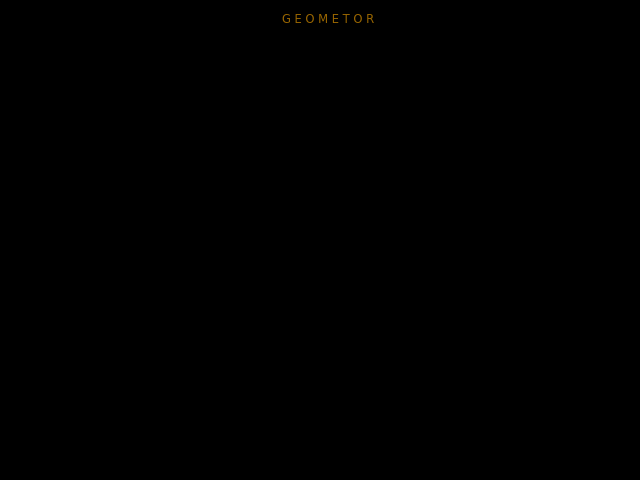

In [6]:
%run run.py
%matplotlib widget
log_init('spiral-3')

plt_init_polar()

# radii = np.arange(0, 500, phi)
# theta = 2 * np.pi * radii

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title('G E O M E T O R', fontdict={'color': '#960', 'size':'small'})
ax.set_axis_off()

def spiral(n=144, cmap=mp.cm.YlGn, color_cycle=21, rev=False, offset=0):
    for i in range(n):
        # radius = i * phi
        radius = n - i 
        theta = 2 * np.pi * i * phi
        color_scale = (((i + offset) % color_cycle) / color_cycle)
        color_scale = color_scale + (1 / (color_cycle * 2))
        if rev:
            color_scale = 1 - color_scale
        color = cmap(color_scale)
        ax.plot(theta, radius, marker='.', markersize=math.sqrt(radius)+4, color=color)

def spiral_params(params):
    '''take params in single dict for multiprocessing'''
    n = params['n']
    n_pad = str(n).zfill(4)
    color_cycle = params['color_cycle']
    cycle_pad = str(color_cycle).zfill(4)
    cmap = params['cmap']
    
    plt.cla()
    plt_init_polar()
    
    title = f'G E O M E T O R • {cmap.name} • cycle: {cycle_pad} • n: {n_pad}'
    ax.set_title(title, fontdict={'color': '#960', 'size':'small'})
    ax.set_axis_off()
    
    spiral(n=n, cmap=cmap, color_cycle=color_cycle)
    
    out = f'out/{cmap_name}-{cycle_pad}'
    if not os.path.isdir(out):
        os.mkdir(out)
    filename = f'{out}/{cmap_name}-{cycle_pad}-{n_pad}.svg'
    plt.savefig(filename, dpi=300)
    return filename

# spiral(n=21, cmap=mp.cm.hot, color_cycle=5)

In [8]:
# grow to n points for each color cycle up to n
# - with Pool

cmap_name = 'copper'
cmap = mp.cm.get_cmap(cmap_name)

generations = []

for cycle in range(2, 3):
    for i in range(1, 611):
        gen = {'n': i, 'cmap': cmap, 'color_cycle': cycle} 
        generations.append(gen)
        
print(f'count: {len(generations)}')
        
with Pool(num_workers) as pool:
    results = pool.map(spiral_params, generations)
print("generation complete")
len(results)


count: 610
generation complete


In [21]:
# anmiate the number of cycles over a fixed size
n=444
n_pad = str(n).zfill(4)

cmap_name = 'PiYG'
cmap = mp.cm.get_cmap(cmap_name)

out = f'out/{cmap_name}-{n_pad}'
if not os.path.isdir(out):
    os.mkdir(out)

for cycle in range(1, n+1):
    cycle_pad = str(cycle).zfill(4)
    plt.cla()
    plt_init_polar()
    ax.set_title(f'G E O M E T O R • {cmap_name} • n: {n_pad} • cycle: {cycle_pad}', fontdict={'color': '#960', 'size':'small'})
    ax.set_axis_off()

    spiral(n, color_map=cmap, color_cycles=cycle, rev=True)
    plt.draw()
    plt.savefig(f'{out}/{cmap_name}-{n_pad}-{cycle_pad}.png', dpi=300)


In [26]:
# rotate the cycle offset  over a fixed size and number of cycles
n=444
n_pad = str(n).zfill(4)

cycles=55
cycles_pad = str(cycles).zfill(4)

cmap_name = 'hsv'
cmap = mp.cm.get_cmap(cmap_name)

out = f'out/rotate'
if not os.path.isdir(out):
    os.mkdir(out)

for offset in range(cycles):
    plt.cla()
    plt_init_polar()
    ax.set_title(f'G E O M E T O R • {cmap_name} • n: {n_pad} • cycles: {cycles_pad} • offset: {offset}', fontdict={'color': '#960', 'size':'small'})
    ax.set_axis_off()

    spiral(n, color_map=cmap, color_cycles=cycles, offset=offset)
    plt.draw()
    plt.savefig(f'{out}/{cmap_name}-{n_pad}-{cycles_pad}-{str(offset).zfill(4)}.png', dpi=300)


In [26]:
# rotate the cycle offset  over a fixed size and number of cycles
n=444
n_pad = str(n).zfill(4)

cycles=55
cycles_pad = str(cycles).zfill(4)

cmap_name = 'hsv'
cmap = mp.cm.get_cmap(cmap_name)

out = f'out/rotate'
if not os.path.isdir(out):
    os.mkdir(out)

for offset in range(cycles):
    plt.cla()
    plt_init_polar()
    ax.set_title(f'G E O M E T O R • {cmap_name} • n: {n_pad} • cycles: {cycles_pad} • offset: {offset}', fontdict={'color': '#960', 'size':'small'})
    ax.set_axis_off()

    spiral(n, color_map=cmap, color_cycles=cycles, offset=offset)
    plt.draw()
    plt.savefig(f'{out}/{cmap_name}-{n_pad}-{cycles_pad}-{str(offset).zfill(4)}.png', dpi=300)


In [ ]:
# grow to n points for each color cycle up to n
n=233
n_pad = str(n).zfill(4)

cmap_name = 'hot'
cmap = mp.cm.get_cmap(cmap_name)

out = f'out/overlay-hot'
if not os.path.isdir(out):
    os.mkdir(out)


for cycle in range(1, n+1):
    cycle_pad = str(cycle).zfill(4)
    # plt.cla()
    # plt_init_polar()
    for i in range(1,n+1):
        i_pad = str(i).zfill(4)
        plt.cla()
        plt_init_polar()
        ax.set_title(f'G E O M E T O R • {cmap_name} • n: {n_pad}-{i_pad} • cycle: {cycle_pad}', fontdict={'color': '#960', 'size':'small'})
        ax.set_axis_off()
        spiral(i, color_map=cmap, color_cycles=cycle)
        plt.savefig(f'{out}/{cmap_name}-{n_pad}-{cycle_pad}-{i_pad}.png', dpi=300)


In [1]:
377 + 233 + 610

1220

In [21]:
# rotate the cycle offset  over a fixed size and number of cycles
def spiral_rotate(params):
    '''take params in single dict for multiprocessing'''
    n = params['n']
    n_pad = str(n).zfill(4)
    
    color_cycle = params['color_cycle']
    cycle_pad = str(color_cycle).zfill(4)
    
    offset = params['offset']
    offset_pad = str(offset).zfill(4)
    
    cmap = params['cmap']
    
    plt.cla()
    plt_init_polar()
    
    title = f'G E O M E T O R • {cmap.name} • n: {n_pad} • cycle: {cycle_pad}-{offset_pad}'
    ax.set_title(title, fontdict={'color': '#960', 'size':'small'})
    ax.set_axis_off()
    
    spiral(n=n, cmap=cmap, color_cycle=color_cycle, offset=offset)
    
    filename = f'{out}/{cmap_name}-{n_pad}-{cycle_pad}-{offset_pad}.png'
    plt.savefig(filename, dpi=300)
    return filename

n=1220

color_cycle=610

cmap_name = 'hot'
cmap = mp.cm.get_cmap(cmap_name)

out = f'out/rotate2'
if not os.path.isdir(out):
    os.mkdir(out)

generations = []

for offset in range(color_cycle):
    gen = {'n': n, 'cmap': cmap, 'color_cycle': color_cycle, 'offset': offset} 
    generations.append(gen)
        
print(len(generations))
        

with Pool(num_workers) as pool:
    results = pool.map(spiral_rotate, generations)

len(results)


610
